In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [2]:
boston = load_boston()

In [3]:
x = pd.DataFrame(boston.data, columns=boston.feature_names)

In [4]:
y = pd.DataFrame(boston.target, columns=['Target'])

In [5]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


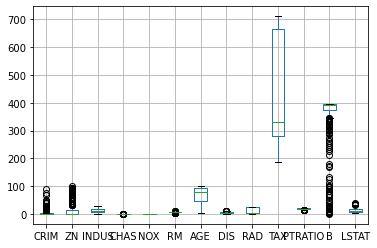

In [6]:
x.boxplot()

In [7]:
x1 = pd.DataFrame(StandardScaler().fit_transform(x), columns=x.columns)

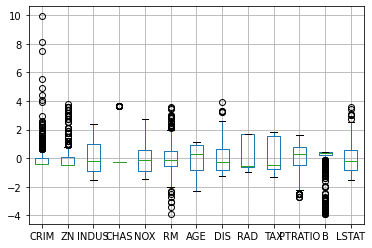

In [8]:
x1.boxplot()

In [9]:
x1.median()

CRIM      -0.390667
ZN        -0.487722
INDUS     -0.211099
CHAS      -0.272599
NOX       -0.144217
RM        -0.108466
AGE        0.317382
DIS       -0.279323
RAD       -0.523001
TAX       -0.464673
PTRATIO    0.274859
B          0.381187
LSTAT     -0.181254
dtype: float64

In [10]:
x2 = x1

In [11]:
x2['CRIM'] = x2.replace(x2['CRIM']>3)

In [12]:
x2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [13]:
x2.max()

CRIM       9.933931
ZN         3.804234
INDUS      2.422565
CHAS       3.668398
NOX        2.732346
RM         3.555044
AGE        1.117494
DIS        3.960518
RAD        1.661245
TAX        1.798194
PTRATIO    1.638828
B          0.441052
LSTAT      3.548771
dtype: float64

In [14]:
x2['CRIM'] = x2['CRIM'].replace(x2['CRIM'][x2['CRIM'] > 3],x2['CRIM'].median())

In [15]:
for i in x2.columns:
    x2[i] = x2[i].replace(x2[i][x2[i] > 3],x2[i].median())

In [16]:
x2.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [17]:
x2.max()

CRIM       2.914251
ZN         2.945843
INDUS      2.422565
CHAS      -0.272599
NOX        2.732346
RM         2.978058
AGE        1.117494
DIS        2.580236
RAD        1.661245
TAX        1.798194
PTRATIO    1.638828
B          0.441052
LSTAT      2.995084
dtype: float64

In [18]:
for i in x2.columns:
    x2[i] = x2[i].replace(x2[i][x2[i] < -3],x2[i].median())

In [19]:
x2.min()

CRIM      -0.419782
ZN        -0.487722
INDUS     -1.557842
CHAS      -0.272599
NOX       -1.465882
RM        -2.730550
AGE       -2.335437
DIS       -1.267069
RAD       -0.982843
TAX       -1.313990
PTRATIO   -2.707379
B         -2.995726
LSTAT     -1.531127
dtype: float64

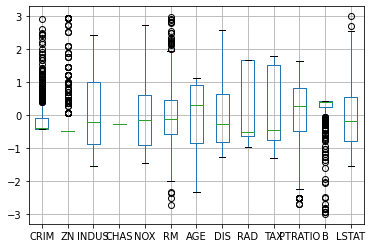

In [37]:
x2.boxplot()

In [20]:
from sklearn.decomposition import PCA

In [21]:
a = PCA().fit(x2)

In [22]:
a.explained_variance_

array([5.39931343e+00, 1.10536903e+00, 9.72244945e-01, 6.94903371e-01,
       3.89287092e-01, 3.34364470e-01, 2.73398454e-01, 2.56600532e-01,
       2.00403978e-01, 1.66499031e-01, 1.08512636e-01, 6.24846842e-02,
       1.97964914e-30])

In [23]:
a.explained_variance_ratio_

array([5.41915749e-01, 1.10943158e-01, 9.75818230e-02, 6.97457344e-02,
       3.90717836e-02, 3.35593357e-02, 2.74403273e-02, 2.57543614e-02,
       2.01140522e-02, 1.67110963e-02, 1.08911451e-02, 6.27143338e-03,
       1.98692493e-31])

In [24]:
import matplotlib.pyplot as plt

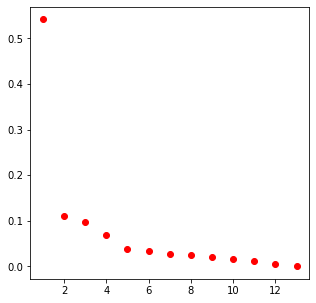

In [25]:
plt.figure(figsize=(5,5))
plt.scatter(range(1,14), a.explained_variance_ratio_, color = 'r')

In [26]:
xf = PCA(n_components=4).fit_transform(x2)

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(xf, y, test_size = 0.2)

In [28]:
model = DecisionTreeRegressor(criterion='mse').fit(xtrain, ytrain)

In [29]:
ypred = model.predict(xtest)

In [30]:
r2_score(ytest, ypred)

0.5061494577771108

### Adaboost

In [31]:
boost = AdaBoostRegressor(base_estimator=model, n_estimators= 100, learning_rate=0.01).fit(xtrain, ytrain)

C:\Users\shoun\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [32]:
ybpred = boost.predict(xtest)

In [33]:
r2_score(ytest, ybpred)

0.6511964336134517

### Gradient Boosting

In [34]:
grad = GradientBoostingRegressor(loss = 'huber', n_estimators=200, learning_rate=0.01).fit(xtrain, ytrain)

C:\Users\shoun\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [35]:
ygbpred = grad.predict(xtest)

In [36]:
r2_score(ytest, ygbpred)

0.6223239455284861